## Predicting Wine Quality

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os

df_white = pd.read_csv('winequality-white.csv', sep=";")
df_red = pd.read_csv('winequality-red.csv', sep=";")

#setting up features (x) and target (y)
x_white = df_white.drop(columns=['quality'])
y_white = df_white['quality']

x_red = df_red.drop(columns=['quality'])
y_red = df_red['quality']

#split into training and testing data
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(x_white, y_white, test_size=0.2, random_state=42)
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_red, y_red, test_size=0.2, random_state=42)

Linear Regression

In [2]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Initialize the model (Linear Regression)
model_white = LinearRegression()
model_red = LinearRegression()
model_white.fit(x_white_train, y_white_train)
model_red.fit(x_red_train, y_red_train)

# Make predictions on the test set
y_white_pred = model_white.predict(x_white_test)
y_red_pred = model_red.predict(x_red_test)

# Evaluate the model using regression metrics
lr_white_mse = mean_squared_error(y_white_test, y_white_pred)
lr_white_mae = mean_absolute_error(y_white_test, y_white_pred)
lr_white_r2 = r2_score(y_white_test, y_white_pred)

lr_red_mse = mean_squared_error(y_red_test, y_red_pred)
lr_red_mae = mean_absolute_error(y_red_test, y_red_pred)
lr_red_r2 = r2_score(y_red_test, y_red_pred)

Random Forest

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor, fit to data, and predict
rf_white_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
rf_red_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
rf_white_model.fit(x_white_train, y_white_train)
rf_red_model.fit(x_red_train, y_red_train)
y_white_pred = rf_white_model.predict(x_white_test)
y_red_pred = rf_red_model.predict(x_red_test)

# Evaluate the model
rf_white_mse = mean_squared_error(y_white_test, y_white_pred)
rf_white_mae = mean_absolute_error(y_white_test, y_white_pred)
rf_white_r2 = r2_score(y_white_test, y_white_pred)
rf_red_mse = mean_squared_error(y_red_test, y_red_pred)
rf_red_mae = mean_absolute_error(y_red_test, y_red_pred)
rf_red_r2 = r2_score(y_red_test, y_red_pred)

Model Comparison Plotter

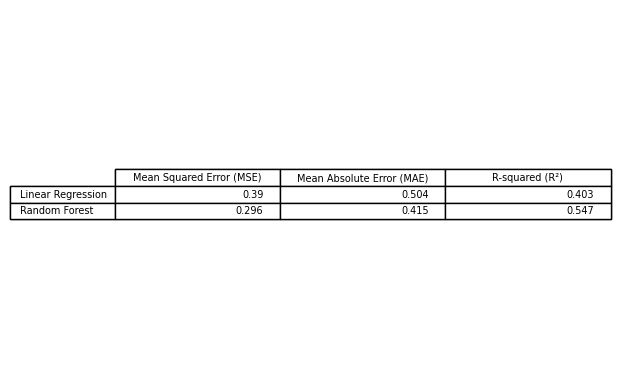

In [7]:
columns = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']
rows = ['Linear Regression', 'Random Forest']
white_data = [
    [round(lr_white_mse, 3), round(lr_white_mae, 3), round(lr_white_r2, 3)],
    [round(rf_white_mse, 3), round(rf_white_mae, 3), round(rf_white_r2, 3)]
]
red_data = [
    [round(lr_red_mse, 3), round(lr_red_mae, 3), round(lr_red_r2, 3)],
    [round(rf_red_mse, 3), round(rf_red_mae, 3), round(rf_red_r2, 3)]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table
white_table = plt.table(cellText=white_data, colLabels=columns, rowLabels=rows, loc='center')
red_table = plt.table(cellText=red_data, colLabels=columns, rowLabels=rows, loc='center')

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# File path
file_path = os.path.join(output_dir, "white_model_comparisson_table.png")
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = plt.table(cellText=white_data, colLabels=columns, rowLabels=rows, loc='center')
plt.savefig(file_path, bbox_inches='tight')
plt.close()

file_path = os.path.join(output_dir, "red_model_comparisson_table.png")
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = plt.table(cellText=red_data, colLabels=columns, rowLabels=rows, loc='center')
plt.savefig(file_path, bbox_inches='tight')
plt.close()

## Feature Importance

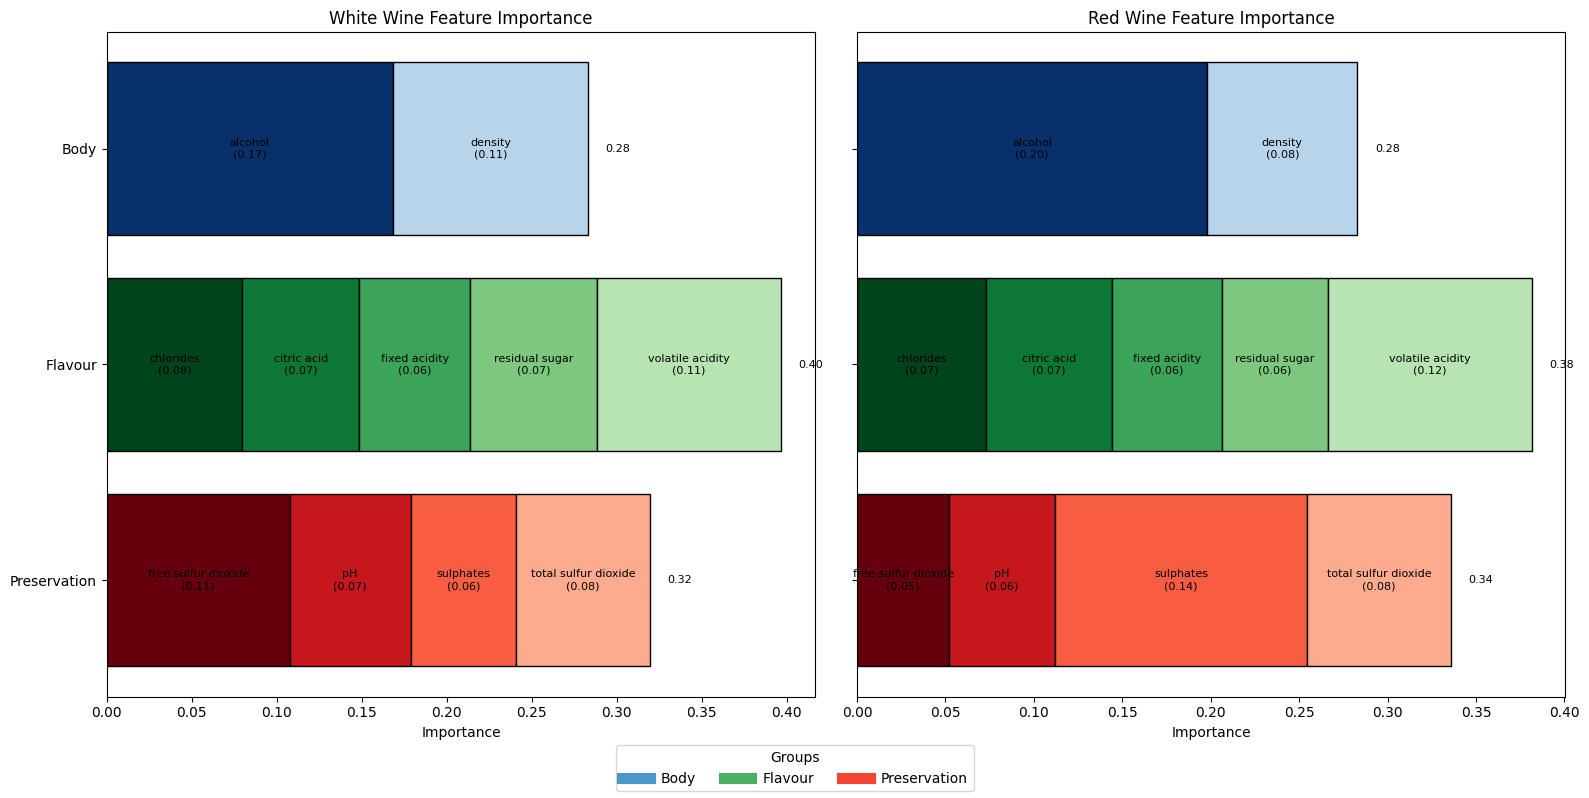

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Grouping of features
feature_groups = {
    'Body': ['alcohol', 'density'],
    'Flavour': ['residual sugar', 'volatile acidity', 'citric acid', 'fixed acidity', 'chlorides'],
    'Preservation': ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']
}

# Function to prepare data and sort features alphabetically within groups
def prepare_data(model_importances, feature_columns):
    importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': model_importances
    }).sort_values(by='Feature')  # Sort alphabetically first

    # Map features to groups
    importance_df['Group'] = importance_df['Feature'].map(
        lambda x: next((g for g, features in feature_groups.items() if x in features), 'Other')
    )

    # Sort within groups alphabetically
    importance_df = importance_df.sort_values(by=['Group', 'Feature'])
    return importance_df

# Prepare data for both models
white_importance_df = prepare_data(rf_white_model.feature_importances_, x_white_train.columns)
red_importance_df = prepare_data(rf_red_model.feature_importances_, x_red_train.columns)

# Group data
white_group_data = white_importance_df.groupby('Group')
red_group_data = red_importance_df.groupby('Group')
groups = ['Preservation', 'Flavour', 'Body']  # Reverse order here

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
color_palettes = {
    'Body': plt.cm.Blues,
    'Flavour': plt.cm.Greens,
    'Preservation': plt.cm.Reds
}

for ax, group_data, title in zip(axes, [white_group_data, red_group_data], ['White Wine', 'Red Wine']):
    bar_positions = np.arange(len(groups))  # Ensure consistent y-axis positions
    bottoms = np.zeros(len(groups))  # Reset stacking

    for i, group_name in enumerate(groups):
        features = group_data.get_group(group_name)
        feature_importances = features['Importance'].tolist()
        feature_names = features['Feature'].tolist()
        num_features = len(feature_importances)

        # Generate color shades for the current group (decreasing intensity)
        colors = [color_palettes[group_name](1 - (0.7 * (j / max(num_features - 1, 1)))) for j in range(num_features)]

        # Add stacked bars
        for j, (importance, feature) in enumerate(zip(feature_importances, feature_names)):
            bar = ax.barh(bar_positions[i], importance, left=bottoms[i], color=colors[j], edgecolor='black')

            # Calculate label position
            label_x = bottoms[i] + importance / 2

            # Add vertical labels for each bar
            ax.text(
                label_x,
                bar_positions[i],
                f"{feature}\n({importance:.2f})",
                ha='center',
                va='center',
                rotation=0,  # Rotate text vertically
                color='black',
                fontsize=8
            )
            bottoms[i] += importance  # Update stacking

        # Add total value at the end of the group bar
        total_value = bottoms[i]
        ax.text(
            total_value + 0.01,  # Slightly offset from the bar
            bar_positions[i],
            f"{total_value:.2f}",
            ha='left',
            va='center',
            color='black',
            fontsize=8
        )

    # Customize each subplot
    ax.set_yticks(bar_positions)
    ax.set_yticklabels(groups)  # Ensure y-tick labels reflect reversed order
    ax.set_xlabel('Importance')
    ax.set_title(f'{title} Feature Importance')

# Add a shared legend outside the plot area
group_handles = [
    plt.Line2D([0], [0], color=color_palettes[group_name](0.6), lw=8, label=group_name)
    for group_name in feature_groups.keys()
]
fig.legend(handles=group_handles, title="Groups", loc='lower center', ncol=len(feature_groups))

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Ensure the chart fits within the remaining area

# Save the figure instead of displaying
plt.savefig('output/feature_importance_plot.png', dpi=300, bbox_inches='tight')  # Save as a PNG file with high resolution


Shap Values

C:\Users\chris\AppData\Local\Temp\ipykernel_7660\851205030.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar


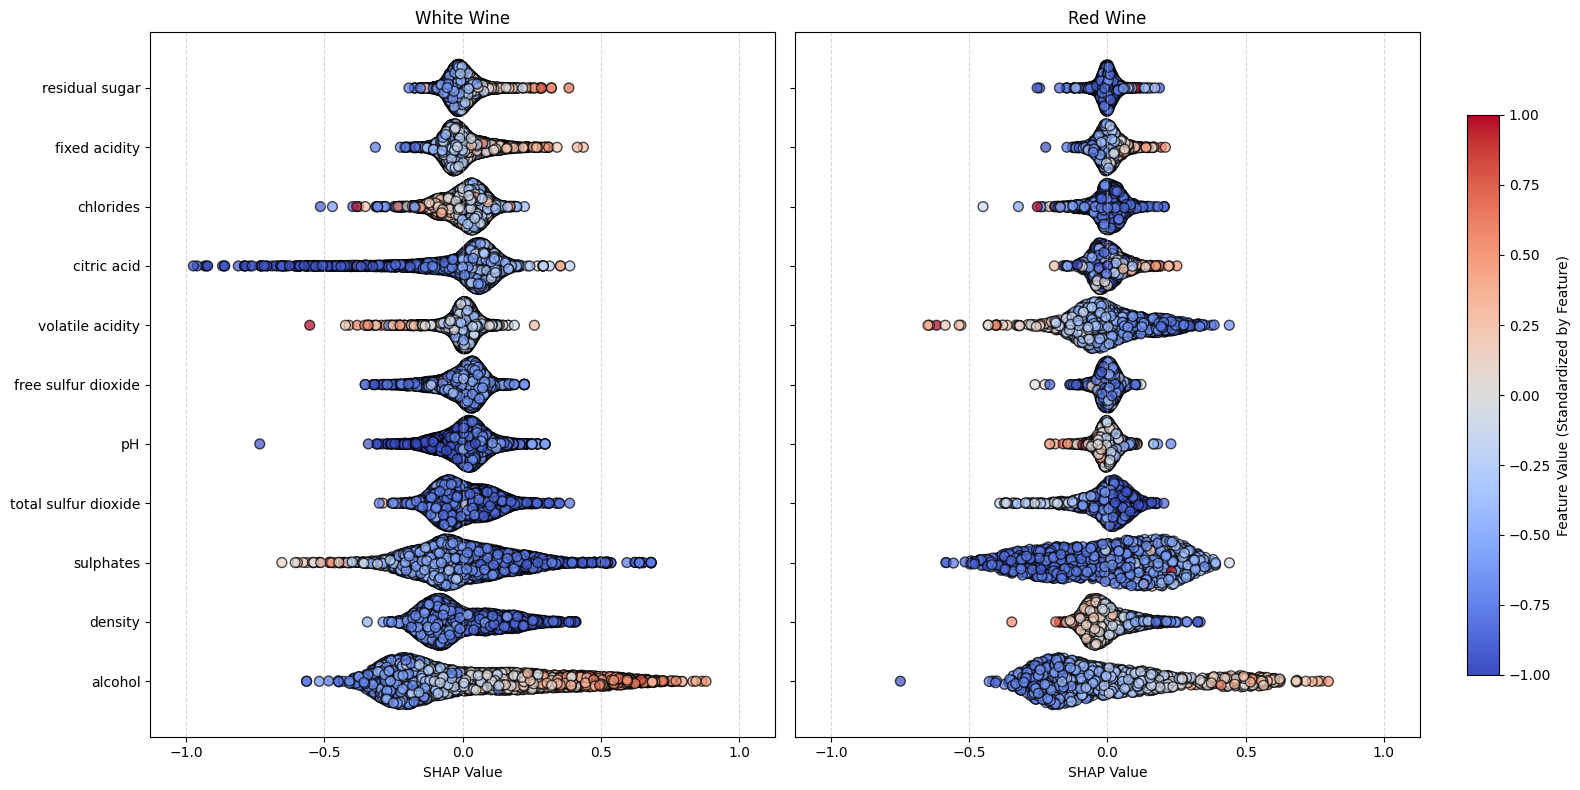

In [15]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# SHAP values for white and red wine models
shap_values_white = shap.TreeExplainer(rf_white_model).shap_values(x_white_train)
shap_values_red = shap.TreeExplainer(rf_red_model).shap_values(x_red_train)

# Corresponding feature values
x_white_values = x_white_train.values
x_red_values = x_red_train.values

# Combine feature values across both datasets for standardization
combined_feature_values = np.vstack([x_white_values, x_red_values])

# Standardize each feature across the combined datasets
feature_means = combined_feature_values.mean(axis=0)
feature_stds = combined_feature_values.std(axis=0)
standardized_white_values = (x_white_values - feature_means) / feature_stds
standardized_red_values = (x_red_values - feature_means) / feature_stds

# Features for plotting
feature_names = x_white_train.columns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Define feature groups (replace with actual feature-to-group mappings)
feature_groups = {
    'Body': ['alcohol', 'density'],
    'Flavour': ['residual sugar', 'volatile acidity', 'citric acid', 'fixed acidity', 'chlorides'],
    'Preservation': ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']
}

# Combine feature groups for ordering
grouped_features = {feature: group for group, features in feature_groups.items() for feature in features}

for ax, shap_values, standardized_values, title in zip(
    axes,
    [shap_values_white, shap_values_red],
    [standardized_white_values, standardized_red_values],
    ['White Wine', 'Red Wine']
):
    # Aggregate absolute SHAP values for mean importance
    shap_means = np.abs(shap_values).mean(axis=0)
    sorted_indices = np.argsort(shap_means)[::-1]
    
    # Sort features by importance, then by group
    sorted_feature_names = feature_names[sorted_indices]
    sorted_groups = [grouped_features[feature] for feature in sorted_feature_names]
    grouped_indices = np.argsort([sorted_groups.index(grouped_features[f]) for f in sorted_feature_names])
    
    # Apply grouping to SHAP values and feature values
    sorted_shap_values = shap_values[:, sorted_indices[grouped_indices]]
    sorted_standardized_values = standardized_values[:, sorted_indices[grouped_indices]]
    sorted_feature_names = sorted_feature_names[grouped_indices]

    # Plot each feature
    for i, (shap_col, feat_col, feat_name) in enumerate(
        zip(sorted_shap_values.T, sorted_standardized_values.T, sorted_feature_names)
    ):
        # Compute density of SHAP values for this feature
        kde = gaussian_kde(shap_col)
        density = kde(shap_col)
        
        # Scale density to control maximum jitter
        max_deviation = density / density.max() * 0.4  # Adjust scaling factor as needed
        
        # Generate random jitter with density-based cap
        y = np.random.uniform(-max_deviation, max_deviation) + i  # Center around feature index `i`
        
        # Normalize the standardized feature values to [0, 1]
        feat_col_normalized = (feat_col - feat_col.min()) / (feat_col.max() - feat_col.min())
        
        # Map feature values to colors (blue to red)
        cmap = plt.cm.coolwarm
        colors = cmap(feat_col_normalized)

        ax.scatter(
            shap_col,
            y,
            color=colors,
            edgecolor="k",
            alpha=0.7,
            s=50,
            label=feat_name if i == 0 else None,  # Add label once for legend
        )

    ax.set_yticks(range(len(sorted_feature_names)))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_title(title)
    ax.set_xlabel("SHAP Value")
    ax.grid(axis="x", linestyle="--", alpha=0.5)

# Unified x-axis scaling
shap_minmax = max(abs(min(shap_values_white.min(), shap_values_red.min())), abs(max(shap_values_white.max(), shap_values_red.max())))+0.25
for ax in axes:
    ax.set_xlim(-shap_minmax, shap_minmax)

# Add a shared color bar description
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Manually position the color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_label("Feature Value (Standardized by Feature)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar

# Save the figure
output_path = "output/shap_summary.png"  # Replace with your desired path
plt.savefig(output_path, dpi=300, bbox_inches="tight")

C:\Users\chris\AppData\Local\Temp\ipykernel_7660\2483322075.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar


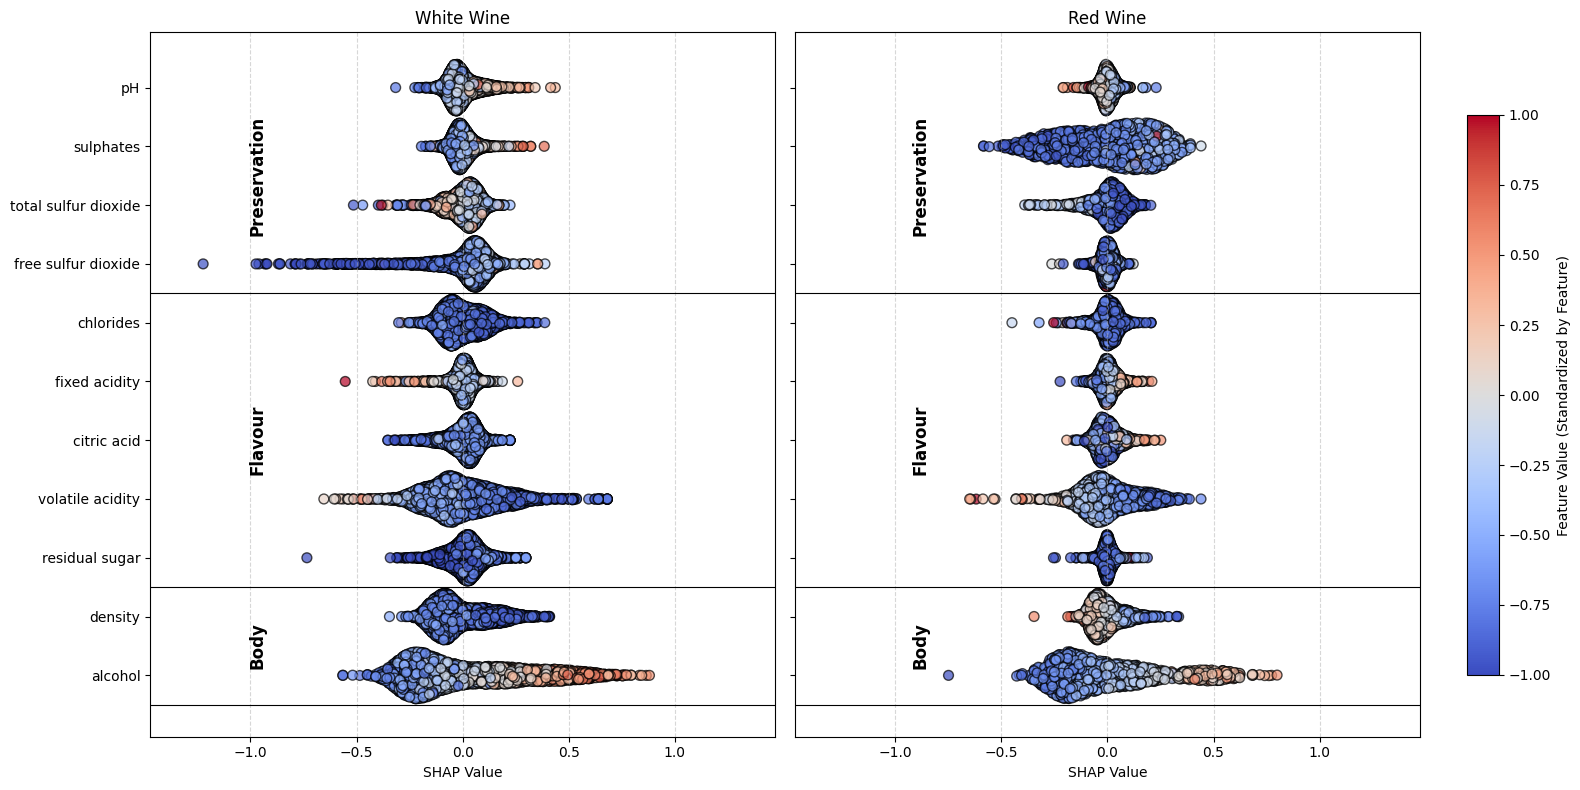

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# SHAP values for white and red wine models
shap_values_white = shap.TreeExplainer(rf_white_model).shap_values(x_white_train)
shap_values_red = shap.TreeExplainer(rf_red_model).shap_values(x_red_train)

# Corresponding feature values
x_white_values = x_white_train.values
x_red_values = x_red_train.values

# Combine feature values across both datasets for standardization
combined_feature_values = np.vstack([x_white_values, x_red_values])

# Standardize each feature across the combined datasets
feature_means = combined_feature_values.mean(axis=0)
feature_stds = combined_feature_values.std(axis=0)
standardized_white_values = (x_white_values - feature_means) / feature_stds
standardized_red_values = (x_red_values - feature_means) / feature_stds

# Features for plotting
feature_names = x_white_train.columns

# Define feature groups and manually specify feature order
feature_groups = {
    'Body': ['alcohol', 'density'],
    'Flavour': ['residual sugar', 'volatile acidity', 'citric acid', 'fixed acidity', 'chlorides'],
    'Preservation': ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'pH']
}

# Flatten feature order from groups
manual_feature_order = [feature for group in feature_groups.values() for feature in group]

# Align SHAP and feature values to the manual feature order
feature_order_indices = [list(feature_names).index(feature) for feature in manual_feature_order]
ordered_feature_names = np.array(feature_names)[feature_order_indices]
shap_values_white = shap_values_white[:, feature_order_indices]
shap_values_red = shap_values_red[:, feature_order_indices]
standardized_white_values = standardized_white_values[:, feature_order_indices]
standardized_red_values = standardized_red_values[:, feature_order_indices]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Compute group boundaries for labeling
group_boundaries = []
current_group = [group for group, features in feature_groups.items() if manual_feature_order[0] in features][0]
group_start = 0

for i, feature in enumerate(manual_feature_order):
    group = [g for g, features in feature_groups.items() if feature in features][0]
    if group != current_group:
        group_boundaries.append((current_group, group_start, i))
        current_group = group
        group_start = i

# Add the last group
group_boundaries.append((current_group, group_start, len(manual_feature_order)))

# Plot each feature and add group headings
for ax, shap_values, standardized_values, title in zip(
    axes,
    [shap_values_white, shap_values_red],
    [standardized_white_values, standardized_red_values],
    ['White Wine', 'Red Wine']
):
    for i, (shap_col, feat_col, feat_name) in enumerate(
        zip(shap_values.T, standardized_values.T, manual_feature_order)
    ):
        # Compute density of SHAP values for this feature
        kde = gaussian_kde(shap_col)
        density = kde(shap_col)
        
        # Scale density to control maximum jitter
        max_deviation = density / density.max() * 0.4  # Adjust scaling factor as needed
        
        # Generate random jitter with density-based cap
        y = np.random.uniform(-max_deviation, max_deviation) + i  # Center around feature index `i`
        
        # Normalize the standardized feature values to [0, 1]
        feat_col_normalized = (feat_col - feat_col.min()) / (feat_col.max() - feat_col.min())
        
        # Map feature values to colors (blue to red)
        cmap = plt.cm.coolwarm
        colors = cmap(feat_col_normalized)

        ax.scatter(
            shap_col,
            y,
            color=colors,
            edgecolor="k",
            alpha=0.7,
            s=50,
        )

    # Set the y-axis with grouped labels
    ax.set_yticks(range(len(manual_feature_order)))
    ax.set_yticklabels(manual_feature_order)

    # Add group headings on the left axis
    for group, start, end in group_boundaries:
        ax.axhline(y=start - 0.5, color='black', linewidth=0.8)  # Divider line
        ax.text(
            -shap_values.max() * 1.1,  # Position left of the plot
            (start + end - 1) / 2,  # Center the group label
            group,
            rotation=90,
            verticalalignment='center',
            horizontalalignment='center',
            fontsize=12,
            fontweight='bold',
        )

    ax.set_title(title)
    ax.set_xlabel("SHAP Value (Impact on Quality)")
    ax.grid(axis="x", linestyle="--", alpha=0.5)

# Unified x-axis scaling
shap_minmax = max(abs(min(shap_values_white.min(), shap_values_red.min())), abs(max(shap_values_white.max(), shap_values_red.max()))) + 0.25
for ax in axes:
    ax.set_xlim(-shap_minmax, shap_minmax)

# Add a shared color bar description
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Manually position the color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_label("Feature Value (Standardized by Feature)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar

# Save the figure
output_path = "output/shap_summary.png"  # Replace with your desired path
plt.savefig(output_path, dpi=300, bbox_inches="tight")


Cumulative Shaps

Shap Interactions